In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

In [ ]:
def create_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='swish', input_shape=(28, 28, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='swish'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation='swish'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='swish'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='swish'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [ ]:
model = create_model()
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
 history = model.fit(
        datagen.flow(x_train, y_train, batch_size=64),
        epochs=50,
        validation_data=(x_test, y_test),
        verbose=2,
        steps_per_epoch=len(x_train) // 64
    )

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 - 26s - 27ms/step - accuracy: 0.9102 - loss: 0.2921 - val_accuracy: 0.9837 - val_loss: 0.0506
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 792us/step - accuracy: 0.9531 - loss: 0.1444 - val_accuracy: 0.9833 - val_loss: 0.0536
Epoch 3/50
937/937 - 34s - 36ms/step - accuracy: 0.9677 - loss: 0.1074 - val_accuracy: 0.9899 - val_loss: 0.0290
Epoch 4/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 843us/step - accuracy: 0.9531 - loss: 0.1528 - val_accuracy: 0.9893 - val_loss: 0.0299
Epoch 5/50
937/937 - 19s - 20ms/step - accuracy: 0.9753 - loss: 0.0809 - val_accuracy: 0.9930 - val_loss: 0.0228
Epoch 6/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 1ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.9930 - val_loss: 0.0227
Epoch 7/50
937/937 - 20s - 22ms/step - accuracy: 0.9790 - loss: 0.0709 - val_accuracy: 0.9879 - val_loss: 0.0342
Epoch 8/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 840us/step - accuracy: 0.9688 - loss: 0.0619 - val_accuracy: 0.9881 - val_loss: 0.0337
Epoch 9/50
937/937 - 20s - 21ms/step - accuracy: 0.9809 - loss: 0.0623 - val_accuracy: 0.9918 - val_loss: 0.0235
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 848us/step - accuracy: 0.9688 - loss: 0.1717 - val_accuracy: 0.9921 - val_loss: 0.0223
Epoch 11/50
937/937 - 39s - 42ms/step - accuracy: 0.9819 - loss: 0.0588 - val_accuracy: 0.9929 - val_loss: 0.0244
Epoch 12/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 1ms/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 0.9925 - val_loss: 0.0248
Epoch 13/50
937/937 - 19s - 21ms/step - accuracy: 0.9835 - loss: 0.0531 - val_accuracy: 0.9924 - val_loss: 0.0236
Epoch 14/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 836us/step - accuracy: 0.9844 - loss: 0.0441 - val_accuracy: 0.9924 - val_loss: 0.0236
Epoch 15/50
937/937 - 20s - 21ms/step - accuracy: 0.9846 - loss: 0.0494 - val_accuracy: 0.9933 - val_loss: 0.0179
Epoch 16/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 880us/step - accuracy: 0.9688 - loss: 0.0432 - val_accuracy: 0.9936 - val_loss: 0.0182
Epoch 17/50
937/937 - 19s - 21ms/step - accuracy: 0.9855 - loss: 0.0476 - val_accuracy: 0.9941 - val_loss: 0.0171
Epoch 18/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 1ms/step - accuracy: 0.9844 - loss: 0.0564 - val_accuracy: 0.9941 - val_loss: 0.0171
Epoch 19/50
937/937 - 40s - 43ms/step - accuracy: 0.9864 - loss: 0.0446 - val_accuracy: 0.9940 - val_loss: 0.0173
Epoch 20/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 1ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9941 - val_loss: 0.0174
Epoch 21/50
937/937 - 38s - 41ms/step - accuracy: 0.9862 - loss: 0.0443 - val_accuracy: 0.9962 - val_loss: 0.0133
Epoch 22/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 1ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9961 - val_loss: 0.0134
Epoch 23/50
937/937 - 20s - 21ms/step - accuracy: 0.9875 - loss: 0.0420 - val_accuracy: 0.9938 - val_loss: 0.0188
Epoch 24/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 842us/step - accuracy: 0.9844 - loss: 0.0477 - val_accuracy: 0.9940 - val_loss: 0.0187
Epoch 25/50
937/937 - 19s - 21ms/step - accuracy: 0.9881 - loss: 0.0403 - val_accuracy: 0.9941 - val_loss: 0.0197
Epoch 26/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 821us/step - accuracy: 0.9844 - loss: 0.0507 - val_accuracy: 0.9941 - val_loss: 0.0199
Epoch 27/50
937/937 - 19s - 20ms/step - accuracy: 0.9881 - loss: 0.0385 - val_accuracy: 0.9948 - val_loss: 0.0153
Epoch 28/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 1ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 0.9945 - val_loss: 0.0154
Epoch 29/50
937/937 - 20s - 22ms/step - accuracy: 0.9883 - loss: 0.0396 - val_accuracy: 0.9947 - val_loss: 0.0150
Epoch 30/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 1ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.9949 - val_loss: 0.0150
Epoch 31/50
937/937 - 38s - 41ms/step - accuracy: 0.9887 - loss: 0.0371 - val_accuracy: 0.9950 - val_loss: 0.0152
Epoch 32/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 993us/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9950 - val_loss: 0.0151
Epoch 33/50
937/937 - 19s - 20ms/step - accuracy: 0.9899 - loss: 0.0343 - val_accuracy: 0.9959 - val_loss: 0.0131
Epoch 34/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 864us/step - accuracy: 0.9844 - loss: 0.0940 - val_accuracy: 0.9960 - val_loss: 0.0131
Epoch 35/50
937/937 - 20s - 21ms/step - accuracy: 0.9894 - loss: 0.0359 - val_accuracy: 0.9959 - val_loss: 0.0130
Epoch 36/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 1ms/step - accuracy: 0.9844 - loss: 0.0193 - val_accuracy: 0.9959 - val_loss: 0.0130
Epoch 37/50
937/937 - 39s - 42ms/step - accuracy: 0.9895 - loss: 0.0345 - val_accuracy: 0.9968 - val_loss: 0.0107
Epoch 38/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 1ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.9968 - val_loss: 0.0108
Epoch 39/50
937/937 - 20s - 21ms/step - accuracy: 0.9902 - loss: 0.0323 - val_accuracy: 0.9969 - val_loss: 0.0120
Epoch 40/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 821us/step - accuracy: 1.0000 - loss: 0.0125 - val_accuracy: 0.9969 - val_loss: 0.0119
Epoch 41/50
937/937 - 19s - 21ms/step - accuracy: 0.9900 - loss: 0.0329 - val_accuracy: 0.9965 - val_loss: 0.0119
Epoch 42/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 819us/step - accuracy: 1.0000 - loss: 3.3650e-04 - val_accuracy: 0.9964 - val_loss: 0.0119
Epoch 43/50
937/937 - 19s - 20ms/step - accuracy: 0.9901 - loss: 0.0321 - val_accuracy: 0.9946 - val_loss: 0.0177
Epoch 44/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 837us/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.9944 - val_loss: 0.0179
Epoch 45/50
937/937 - 20s - 21ms/step - accuracy: 0.9903 - loss: 0.0316 - val_accuracy: 0.9948 - val_loss: 0.0154
Epoch 46/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 831us/step - accuracy: 0.9844 - loss: 0.0399 - val_accuracy: 0.9950 - val_loss: 0.0153
Epoch 47/50
937/937 - 39s - 41ms/step - accuracy: 0.9907 - loss: 0.0304 - val_accuracy: 0.9955 - val_loss: 0.0136
Epoch 48/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 1ms/step - accuracy: 0.9688 - loss: 0.0940 - val_accuracy: 0.9956 - val_loss: 0.0136
Epoch 49/50
937/937 - 20s - 21ms/step - accuracy: 0.9909 - loss: 0.0311 - val_accuracy: 0.9962 - val_loss: 0.0128
Epoch 50/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 - 1s - 1ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9961 - val_loss: 0.0130


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n Test Accuracy: {test_acc:.4f}")


 Test Accuracy: 0.9961


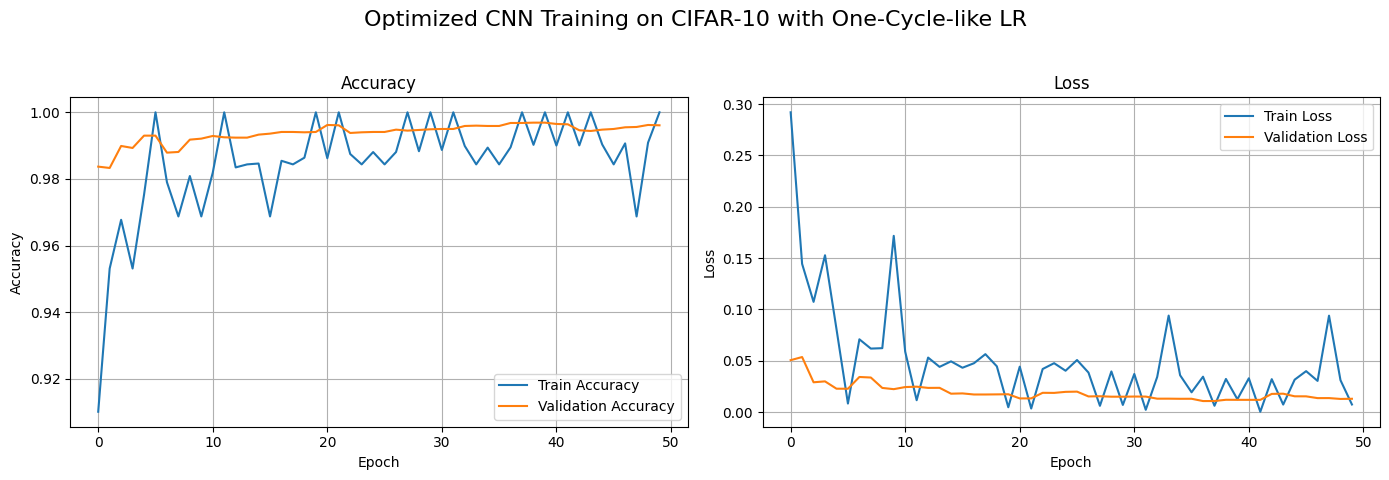

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(14, 5))
    plt.suptitle(title, fontsize=16)

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    if 'lr' in history.history:
        ax2 = plt.gca().twinx()
        ax2.plot(history.history['lr'], color='orange', label='Learning Rate', linestyle=':')
        ax2.set_ylabel('Learning Rate', color='orange')
        ax2.tick_params(axis='y', labelcolor='orange')
        lines, labels = plt.gca().get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc='lower right')
    else:
        plt.legend()
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_history(history, "Optimized CNN Training on CIFAR-10 with One-Cycle-like LR")

#  MNIST Classification: From Dense to CNN

##  Objective
Train and evaluate models on the MNIST dataset to classify handwritten digits (0–9), starting with a basic dense network and improving accuracy using a convolutional neural network (CNN).

---

##  1. Basic Model (Dense Neural Network)

###  Highlights
- Flattens 28×28 images into a 784-length vector.
- Uses fully connected (dense) layers with ReLU activation.
- Applies dropout for regularization.
- Outputs class probabilities using softmax.

###  Performance
- **Accuracy**: ~98.87%
- **Training Time**: Very fast
- **Limitations**:
  - Lacks spatial awareness of image features.
  - Doesn't learn local patterns like edges or corners.
  - Sensitive to position and orientation of digits.

---

##  2. CNN Model (Convolutional Neural Network)

### Highlights
- Uses convolutional layers to learn spatial features (edges, textures).
- Applies max pooling to reduce spatial dimensions and increase invariance.
- Combines learned features through dense layers.
- Employs higher dropout to prevent overfitting due to model complexity.
- Data augmentation is used which improves how the model model is trained giving it better generalization

###  Performance
- **Accuracy**: ~99.61%
- **Training Time**: Moderate (longer than dense net)
- **Advantages**:
  - Understands spatial hierarchies in images.
  - Better generalization to unseen or distorted digits.
  - Robust against translations, rotations, and variations in handwriting.

---

##  Summary Table

| Feature              | Dense Neural Network         | Convolutional Neural Network       |
|----------------------|------------------------------|------------------------------------|
| **Accuracy**          | ~98.87%                      | ~99.61%                            |
| **Architecture**      | Fully connected layers       | Convolution + Pooling + Dense      |
| **Spatial Awareness** |  Not captured              |  Captures local & global features |
| **Training Time**     |  Fast                      |  Moderate                        |
| **Generalization**    | Medium                       | High                               |
| **Best Use Case**     | Simple tabular/image tasks   | Complex image processing tasks      |

---

##  Learnings
- Dense networks are a great starting point but have limited ability to process spatial data.
- CNNs are significantly better at handling image inputs due to their ability to learn hierarchical visual features.
- A relatively simple CNN can push MNIST accuracy to >99.6%, demonstrating the power of deep learning in image classification.
- CNNs give a high accuracy but the model training time is very high.
- For small and less latency tasks dense networks cna be chosen whereas CNNs are chosen if higher accuracy is required and latency is not a concern.